In [1]:
%matplotlib inline
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import scipy
from sklearn import datasets
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [3]:
iris = datasets.load_iris()
print(dir(iris))
X = iris.data
print(iris.feature_names)
print(iris.target)
print(iris.target_names)
target_names = iris.target_names

['DESCR', 'data', 'feature_names', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [4]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
X

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [6]:
X1 = scipy.sparse.csr_matrix(X)
X1

<150x4 sparse matrix of type '<class 'numpy.float64'>'
	with 600 stored elements in Compressed Sparse Row format>

In [7]:
nmf = NMF(n_components=2, random_state=1,
          alpha=.1, l1_ratio=.5)

In [8]:
#nmf.fit(X)
nmf.fit(X1)

NMF(alpha=0.1, beta_loss='frobenius', init=None, l1_ratio=0.5, max_iter=200,
  n_components=2, random_state=1, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [9]:
H = nmf.components_
H

array([[ 6.76461777,  2.76395967,  6.10391613,  2.18052189],
       [ 5.30231367,  3.84341462,  0.9923792 ,  0.        ]])

In [10]:
W = nmf.transform(X)
W.shape

(150, 2)

In [11]:
W

array([[ 0.09389257,  0.84012222],
       [ 0.11943364,  0.74166594],
       [ 0.09051392,  0.76736361],
       [ 0.12501123,  0.7097859 ],
       [ 0.08697396,  0.84507822],
       [ 0.13389541,  0.87025988],
       [ 0.09974124,  0.76401231],
       [ 0.11330739,  0.79833018],
       [ 0.11859339,  0.67355883],
       [ 0.12220175,  0.74936426],
       [ 0.10160355,  0.88687447],
       [ 0.1258036 ,  0.76149414],
       [ 0.11145158,  0.73914356],
       [ 0.0597384 ,  0.73387465],
       [ 0.04465223,  1.02277578],
       [ 0.07948251,  1.0108127 ],
       [ 0.07356545,  0.93340257],
       [ 0.10058148,  0.83211942],
       [ 0.1367114 ,  0.89435706],
       [ 0.09878756,  0.8627773 ],
       [ 0.14864494,  0.80885958],
       [ 0.11110194,  0.83929331],
       [ 0.02147142,  0.86612017],
       [ 0.17045772,  0.73779443],
       [ 0.17105107,  0.71413712],
       [ 0.15089176,  0.72061978],
       [ 0.1417677 ,  0.7665389 ],
       [ 0.1102682 ,  0.83486174],
       [ 0.10081118,

In [12]:
W.dot(nmf.components_)

array([[ 5.08973891,  3.48845331,  1.4068322 ,  0.2047348 ],
       [ 4.74046835,  3.18063947,  1.46502675,  0.26042766],
       [ 4.68109461,  3.19947333,  1.31400506,  0.19736758],
       [ 4.60916064,  3.07352748,  1.46743482,  0.27258972],
       [ 5.06921539,  3.4883785 ,  1.36951979,  0.18964862],
       [ 5.52014217,  3.71485108,  1.68091418,  0.29196188],
       [ 4.72574427,  3.21209684,  1.36700208,  0.21748795],
       [ 4.99947823,  3.38149095,  1.48386507,  0.24706924],
       [ 4.37365918,  2.91655321,  1.3923099 ,  0.25859549],
       [ 4.80001244,  3.21787823,  1.48956271,  0.26646358],
       [ 5.38979582,  3.68945442,  1.50029532,  0.22154876],
       [ 4.88869404,  3.27445378,  1.52358555,  0.27431749],
       [ 4.67309836,  3.14888284,  1.41380181,  0.24302262],
       [ 4.29534101,  2.98569908,  1.0929201 ,  0.13026088],
       [ 5.7251333 ,  4.05436836,  1.2875349 ,  0.09736517],
       [ 5.89731477,  4.10465874,  1.48826405,  0.17331335],
       [ 5.44683536,  3.

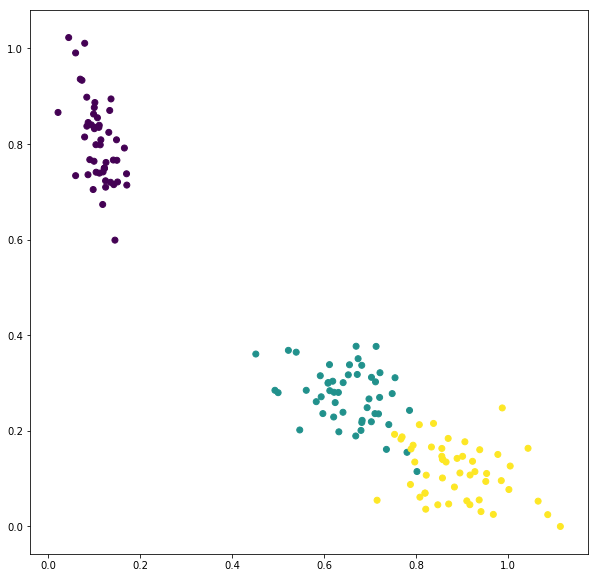

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(W[:, 0], W[:, 1], c=iris.target)

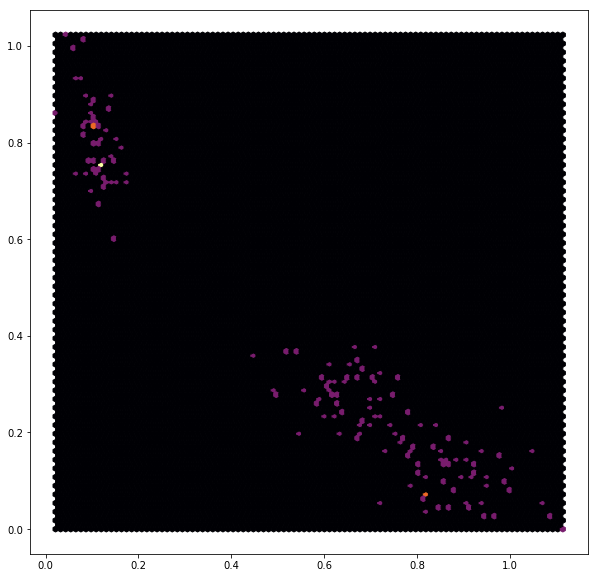

In [14]:
plt.figure(figsize=(10,10))
plt.hexbin(W[:, 0], W[:, 1], cmap='inferno')

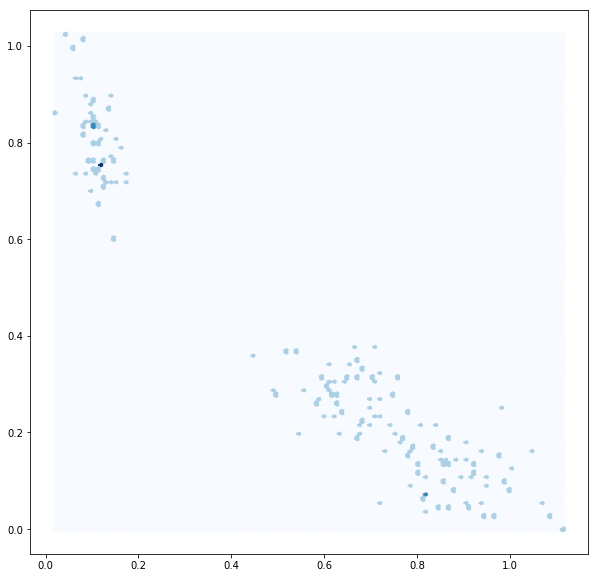

In [15]:
plt.figure(figsize=(10,10))
plt.hexbin(W[:, 0], W[:, 1], cmap='Blues')

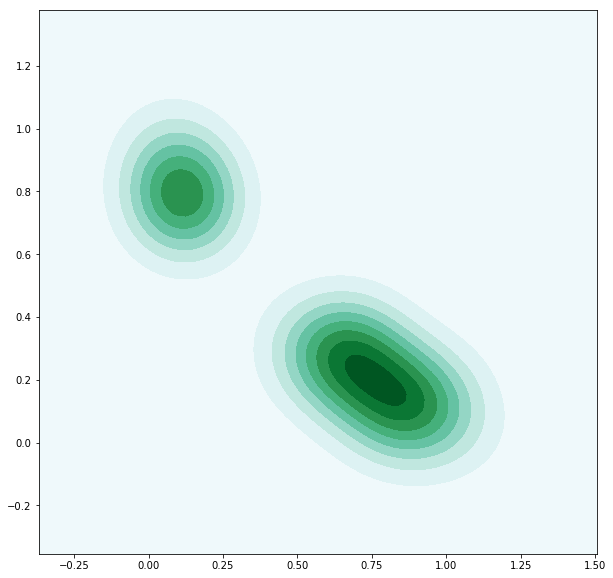

In [16]:
plt.figure(figsize=(10,10))
ax = sns.kdeplot(W[:, 0], W[:, 1], shade=True)

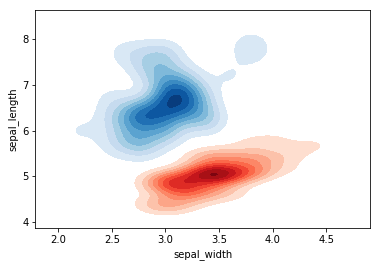

In [17]:
iris = sns.load_dataset("iris")
setosa = iris.loc[iris.species == "setosa"]
virginica = iris.loc[iris.species == "virginica"]
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)

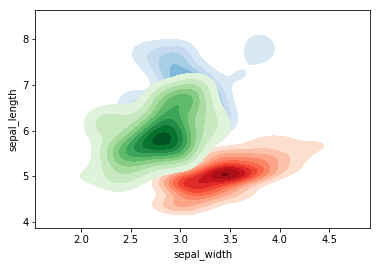

In [18]:
iris = sns.load_dataset("iris")
setosa = iris.loc[iris.species == "setosa"]
virginica = iris.loc[iris.species == "virginica"]
versicolor = iris.loc[iris.species == "versicolor"]
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)
ax = sns.kdeplot(versicolor.sepal_width, versicolor.sepal_length,
                 cmap="Greens", shade=True, shade_lowest=False)

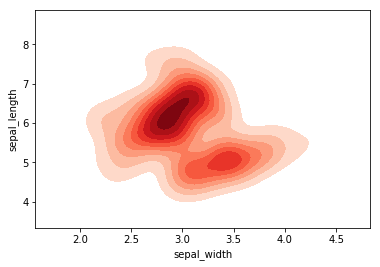

In [20]:
iris = sns.load_dataset("iris")
ax = sns.kdeplot(iris.sepal_width, iris.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)

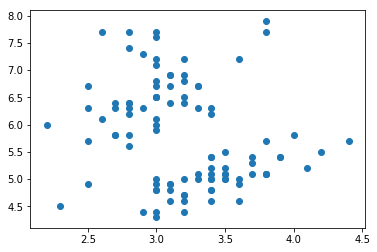

In [19]:
idx = np.in1d(iris.species.values, ["setosa", "virginica"])
plt.scatter(iris.loc[idx].sepal_width, iris.loc[idx].sepal_length)